## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import genfromtxt
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
npArr = np.genfromtxt('Data.csv',delimiter=',')[1:]

#### Explore your data

In [3]:
npArr

array([[12.39999962, 11.19999981],
       [14.30000019, 12.5       ],
       [14.5       , 12.69999981],
       [14.89999962, 13.10000038],
       [16.10000038, 14.10000038],
       [16.89999962, 14.80000019],
       [16.5       , 14.39999962],
       [15.39999962, 13.39999962],
       [17.        , 14.89999962],
       [17.89999962, 15.60000038],
       [18.79999924, 16.39999962],
       [20.29999924, 17.70000076],
       [22.39999962, 19.60000038],
       [19.39999962, 16.89999962],
       [15.5       , 14.        ],
       [16.70000076, 14.60000038],
       [17.29999924, 15.10000038],
       [18.39999962, 16.10000038],
       [19.20000076, 16.79999924],
       [17.39999962, 15.19999981],
       [19.5       , 17.        ],
       [19.70000076, 17.20000076],
       [21.20000076, 18.60000038]])

In [4]:
npArr[0,0] = 2.90000000

In [5]:
npArr

array([[ 2.9       , 11.19999981],
       [14.30000019, 12.5       ],
       [14.5       , 12.69999981],
       [14.89999962, 13.10000038],
       [16.10000038, 14.10000038],
       [16.89999962, 14.80000019],
       [16.5       , 14.39999962],
       [15.39999962, 13.39999962],
       [17.        , 14.89999962],
       [17.89999962, 15.60000038],
       [18.79999924, 16.39999962],
       [20.29999924, 17.70000076],
       [22.39999962, 19.60000038],
       [19.39999962, 16.89999962],
       [15.5       , 14.        ],
       [16.70000076, 14.60000038],
       [17.29999924, 15.10000038],
       [18.39999962, 16.10000038],
       [19.20000076, 16.79999924],
       [17.39999962, 15.19999981],
       [19.5       , 17.        ],
       [19.70000076, 17.20000076],
       [21.20000076, 18.60000038]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [6]:
x = npArr[:,0]
print(x)
y = npArr[:,1]
print(y)

[ 2.9        14.30000019 14.5        14.89999962 16.10000038 16.89999962
 16.5        15.39999962 17.         17.89999962 18.79999924 20.29999924
 22.39999962 19.39999962 15.5        16.70000076 17.29999924 18.39999962
 19.20000076 17.39999962 19.5        19.70000076 21.20000076]
[11.19999981 12.5        12.69999981 13.10000038 14.10000038 14.80000019
 14.39999962 13.39999962 14.89999962 15.60000038 16.39999962 17.70000076
 19.60000038 16.89999962 14.         14.60000038 15.10000038 16.10000038
 16.79999924 15.19999981 17.         17.20000076 18.60000038]


In [7]:
type(x)

numpy.ndarray

#### Explore your data

#### Plot the original data (scatter plot of X,y)

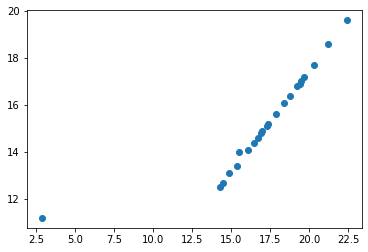

In [8]:
plt.scatter(x, y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

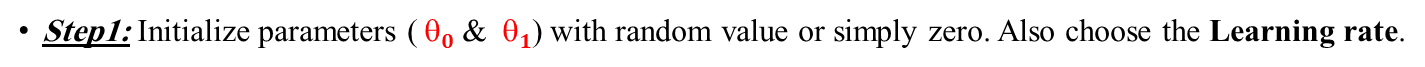

In [9]:
thetas = np.array([0,0])
alpha = 0.001
# onesVec = np.ones(len(x))

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.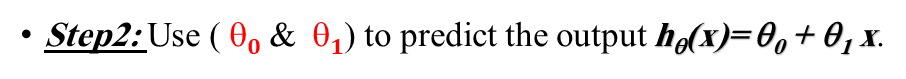
#### Note: you will need to iterate through all data points

In [10]:
def calculate_y_hat(in_,thetas):
    for x in in_:
        var = np.array([1, x])
        y_hat =  var @ thetas
    return y_hat

In [11]:
calculate_y_hat(x, [2,2])

44.40000152

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).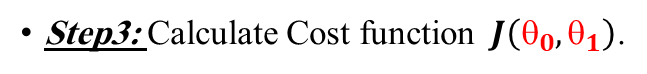
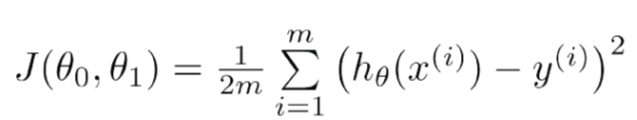

In [12]:
def cost(in_,out_, thetas):
    error = 0
    y_hat = calculate_y_hat(in_, thetas)
    error = (y_hat-out_)**2
    return sum(error/(2*len(x)))

In [13]:
cost(x, y, [0,0])

119.06978384534791

### Step4: Calculate the gradient.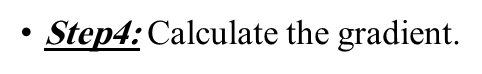
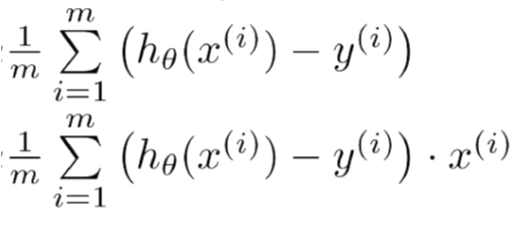

In [14]:
def gradient(x, y, thetas):
    y_hat = calculate_y_hat(x, thetas)
    th0_gradient =   sum(y_hat-y)/len(x)
    th1_gradient = sum((y_hat-y)*x)/len(x)
    return [th0_gradient, th1_gradient]

In [15]:
gradient(x, y, [0,0])

[-15.300000066086955, -267.3356525390435]

### Step5: Update the parameters (simultaneously).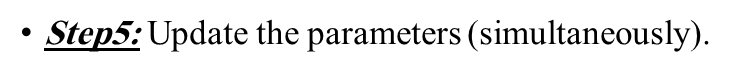
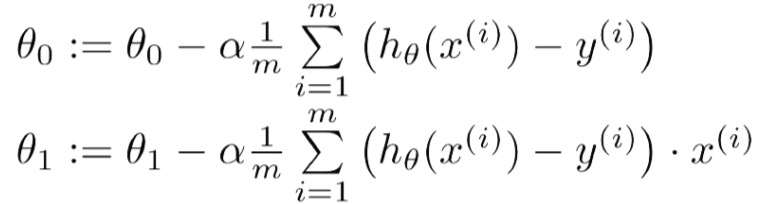

In [16]:
def update_parameters(x, y, thetas, alpha):
    thetas = thetas - alpha*np.array(gradient(x, y, thetas))
    return thetas

In [17]:
update_parameters(x, y, [0,0], 0.01)

array([0.153     , 2.67335653])

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.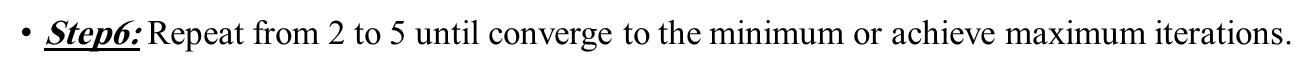

In [18]:
def gradient_descent(x, y, thetas, alpha, itirations):
    cost_array = []
    for i in range(itirations):
        
        error = cost(x, y, thetas)
        cost_array.append(error)
        
        thetas = update_parameters(x, y, thetas, alpha)
        print("Error :",error)
        print("New Thetas: ", thetas)
        
    return cost_array, thetas

loss1, final_thetas = gradient_descent(x, y, [0,0], 0.01, 100)

Error : 119.06978384534791
New Thetas:  [0.153      2.67335653]
Error : 864.318831976582
New Thetas:  [-0.2622816  -4.34372364]
Error : 5796.202738180875
New Thetas:  [ 0.81421066 14.07718347]
Error : 40315.97107136338
New Thetas:  [ -2.02529445 -34.27817733]
Error : 276786.89896175935
New Thetas:  [ 5.41493235 92.65823738]
Error : 1909977.8020935487
New Thetas:  [ -14.129764   -240.55694851]
Error : 13154539.43545768
New Thetas:  [ 37.16260855 634.15387878]
Error : 90665574.39509435
New Thetas:  [  -97.49664465 -1662.01474196]
Error : 624723249.0880655
New Thetas:  [ 255.97845972 4365.5685594 ]
Error : 4305060274.917171
New Thetas:  [  -671.92889265 -11457.20454546]
Error : 29665601860.181576
New Thetas:  [ 1763.87084699 30078.54042505]
Error : 204424908364.0463
New Thetas:  [ -4630.26566018 -78955.32246976]
Error : 1408678543512.3572
New Thetas:  [ 12154.71896007 207265.21752852]
Error : 9707132613861.926
New Thetas:  [ -31906.90292079 -544081.15402489]
Error : 66891302781684.914
New

In [19]:
print(loss1)

[119.06978384534791, 864.318831976582, 5796.202738180875, 40315.97107136338, 276786.89896175935, 1909977.8020935487, 13154539.43545768, 90665574.39509435, 624723249.0880655, 4305060274.917171, 29665601860.181576, 204424908364.0463, 1408678543512.3572, 9707132613861.926, 66891302781684.914, 460944341025629.8, 3176342070074034.0, 2.1887999320684304e+16, 1.5082900237517994e+17, 1.0393543868632925e+18, 7.162134083342725e+18, 4.935387325748826e+19, 3.4009483433955394e+20, 2.3435748549606593e+21, 1.614944581903847e+22, 1.1128494561011453e+23, 7.668584580622195e+23, 5.284379585030827e+24, 3.641436995977229e+25, 2.5092942666797795e+26, 1.729140919847546e+27, 1.1915415263940289e+28, 8.210847322071097e+28, 5.6580498667461736e+29, 3.8989311381460744e+30, 2.6867320681192974e+31, 1.8514123358672517e+32, 1.2757980887170594e+33, 8.79145467296275e+33, 6.058143208576294e+34, 4.174633266152144e+35, 2.876716892758918e+36, 1.9823298367744392e+37, 1.366012620726629e+38, 9.413118066268371e+38, 6.48652804410

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [20]:
y_redicted = []
for i in x:
    y_redicted.append(np.array([1, i]) @ final_thetas)
    print(np.array([1, i]) @ final_thetas)

-1.7895550632475467e+42
-8.684920361552788e+42
-8.805891565636745e+42
-9.047833973804659e+42
-9.773662347535934e+42
-1.0257547163871762e+43
-1.0015604755703848e+43
-9.350262271321435e+42
-1.0318033053220624e+43
-1.0862403758905314e+43
-1.1406774464590004e+43
-1.231405935714033e+43
-1.3584258436556294e+43
-1.176968865145564e+43
-9.410748160670296e+42
-1.0136576534401572e+43
-1.0499489572039675e+43
-1.1164832056422088e+43
-1.164871802198545e+43
-1.0559975461388538e+43
-1.1830174540804502e+43
-1.1951146319502225e+43
-1.2858431212052553e+43


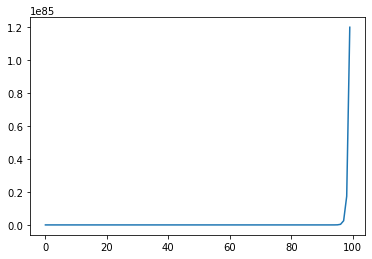

In [21]:
plt.plot(loss1)

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

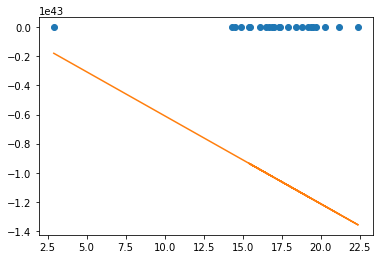

In [22]:
plt.plot(x, y, 'o')
plt.plot(x,  final_thetas[0]+final_thetas[1]*x)

#### Use R2 score to evaluate LR equation output
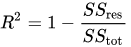
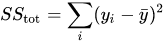
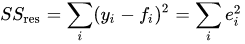
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [23]:
from sklearn.metrics import r2_score

r2_score(y, y_redicted)

-2.767139174600542e+85

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [24]:
def GD_vec(x, y, thetas, alpha):

    l = len(x)
    thetas_ = thetas.reshape(1,2)
    y_ = np.array(y).reshape(l, 1)
    x_  = np.array(x).reshape(l, 1)
    ones = np.ones((len(x),1))
    x_with_ones= np.append(ones, x_, axis=1)
    loss = []
    for i in range(100):
        cost = 0
        calculate_y_hat = np.array(thetas_) @ x_with_ones.T
        cost = sum((calculate_y_hat.reshape(l, 1) - y_)**2)/(2*l)
        loss.append(cost)
        gradient0 = sum(calculate_y_hat.reshape(l, 1) - y_)/l
        gradient1 = sum((calculate_y_hat.reshape(l, 1) - y_)*x_)/l
        thetas_ = thetas_ - alpha*(np.array([gradient0, gradient1]).reshape(1,2))
        
        print("Error: ",cost)
        print("Thetas: " ,thetas_)
    return thetas_, loss

new_thtas, loss2 = GD_vec(x, y, np.array([0,0]),0.001)

Error:  [119.06978385]
Thetas:  [[0.0153     0.26733565]]
Error:  [58.31068168]
Thetas:  [[0.02602605 0.45306342]]
Error:  [28.98303101]
Thetas:  [[0.0335743  0.58209359]]
Error:  [14.82691801]
Thetas:  [[0.03891477 0.67173274]]
Error:  [7.9939016]
Thetas:  [[0.04272135 0.73400472]]
Error:  [4.69564513]
Thetas:  [[0.04546225 0.77726318]]
Error:  [3.10356962]
Thetas:  [[0.04746276 0.80731188]]
Error:  [2.33504464]
Thetas:  [[0.04894888 0.82818301]]
Error:  [1.9640364]
Thetas:  [[0.05007761 0.84267798]]
Error:  [1.78490413]
Thetas:  [[0.05095804 0.85274305]]
Error:  [1.69838781]
Thetas:  [[0.05166596 0.85973043]]
Error:  [1.65657597]
Thetas:  [[0.05225402 0.86457956]]
Error:  [1.63634238]
Thetas:  [[0.05275881 0.86794314]]
Error:  [1.62652432]
Thetas:  [[0.05320573 0.87027461]]
Error:  [1.6217337]
Thetas:  [[0.05361245 0.87188902]]
Error:  [1.61936977]
Thetas:  [[0.05399123 0.87300525]]
Error:  [1.61817717]
Thetas:  [[0.05435061 0.87377537]]
Error:  [1.61754996]
Thetas:  [[0.05469649 0.8

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

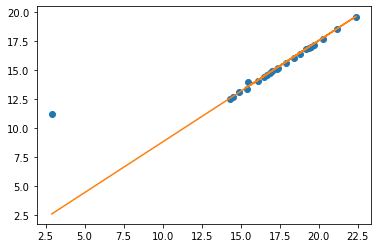

In [25]:
plt.plot(x, y, 'o')
plt.plot(x,  new_thtas[0][0]+new_thtas[0][1]*x)

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

#### __* Done inside GD_vec method__

### Plot loss vs. iterations

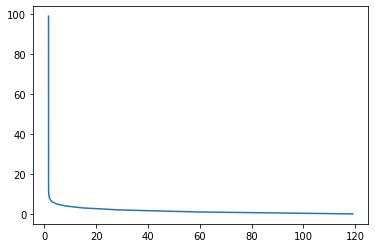

In [26]:
plt.plot(loss2, range(0, 100))
# plot.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [27]:
data = pd.read_excel('MultipleLR.csv.xlsx').to_numpy()
data

array([[ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175],
       [ 76,  83,  71, 149],
       [ 96,  93,  95, 192]], dtype=int64)

In [28]:
x = data[:, [0,1,2]] # with shape (25, 3)
n = len(x)
ones = np.ones((len(x),1))
x = np.append(ones, x, axis=1) # with shape (25, 4)
m = x.shape[1]
y = data[:, -1].reshape([n, 1]) # (25, 1)

thetas = np.zeros(m).reshape(1, m) # with shape (1, 4)
alpha = 0.0001
loss = []
for i in range(1000) :
    grads = []
    cost = 0

    y_hat = thetas @ x.T  # shape (1, 25)
    cost = np.sum((y_hat-y.T)**2)/(n*2)
    loss.append(cost)
    
    for i in range(m):
        s = np.sum((y_hat-y.T)*(x[:, i].reshape(1, n)))/n
        grads.append(s)

    thetas =thetas - alpha * (np.array(grads).reshape(1, 4))

    print("Cost :" ,cost)
    print("Thetas: ", thetas)


Cost : 13483.229166666666
Thetas:  [[0.01624583 1.31582917 1.31883333 1.35532083]]
Cost : 12666.065587484476
Thetas:  [[0.00049764 0.03964437 0.03973326 0.04342726]]
Cost : 11898.447806427022
Thetas:  [[0.01575834 1.27566637 1.27857823 1.31662073]]
Cost : 11177.371754525897
Thetas:  [[0.00096488 0.07683399 0.07700833 0.08431881]]
Cost : 10500.01550616474
Thetas:  [[0.01530019 1.23788778 1.24071494 1.28036427]]
Cost : 9863.72823532394
Thetas:  [[0.00140358 0.11171786 0.11197451 0.122828  ]]
Cost : 9266.019841432702
Thetas:  [[0.0148696  1.20234901 1.20509871 1.24640291]]
Cost : 8704.551204228732
Thetas:  [[0.00181546 0.14443592 0.14477208 0.15909886]]
Cost : 8177.125029487354
Thetas:  [[0.01446489 1.16891438 1.17159356 1.21459707]]
Cost : 7681.677249794397
Thetas:  [[0.00220214 0.17511964 0.17553277 0.19326672]]
Cost : 7216.268946709271
Thetas:  [[0.01408449 1.13745647 1.14007174 1.18481568]]
Cost : 6779.078762705241
Thetas:  [[0.00256514 0.20389252 0.20438034 0.22545869]]
Cost : 6368.3

Thetas:  [[0.00775188 0.60137798 0.60540204 0.74793736]]
Cost : 20.740094948840888
Thetas:  [[0.0083037  0.64592308 0.65009633 0.79485436]]
Cost : 19.78098663779686
Thetas:  [[0.00776358 0.60200543 0.60612618 0.7507402 ]]
Cost : 18.879618873334312
Thetas:  [[0.00828176 0.64382782 0.64809227 0.79485155]]
Cost : 18.032492391019275
Thetas:  [[0.0077742  0.60255118 0.6067699  0.75345108]]
Cost : 17.236320087547373
Thetas:  [[0.00826077 0.64181602 0.64617331 0.79492674]]
Cost : 16.48801415697433
Thetas:  [[0.0077838  0.60302033 0.60733827 0.75607527]]
Cost : 15.78467400690495
Thetas:  [[0.00824068 0.63988273 0.64433448 0.79507488]]
Cost : 15.123574907350687
Thetas:  [[0.00779244 0.60341763 0.60783607 0.7586177 ]]
Cost : 14.502157327831709
Thetas:  [[0.00822144 0.63802333 0.64257114 0.79529124]]
Cost : 13.918016920993972
Thetas:  [[0.00780018 0.60374756 0.60826777 0.76108301]]
Cost : 13.36889511354203
Thetas:  [[0.00820297 0.63623346 0.64087889 0.79557136]]
Cost : 12.852670267663816
Thetas: 

Thetas:  [[0.00717387 0.55087109 0.5725757  0.89697575]]
Cost : 3.9558049530915445
Thetas:  [[0.00716866 0.55056045 0.57236505 0.89737243]]
Cost : 3.9528668417603208
Thetas:  [[0.00716436 0.55032325 0.57222813 0.8978434 ]]
Cost : 3.9499402768409504
Thetas:  [[0.00715917 0.55001563 0.57202077 0.89824064]]
Cost : 3.94702520870651
Thetas:  [[0.00715482 0.54977702 0.57188269 0.89870762]]
Cost : 3.944121588074822
Thetas:  [[0.00714965 0.54947228 0.57167847 0.89910529]]
Cost : 3.9412293659988933
Thetas:  [[0.00714526 0.54923239 0.57153937 0.89956841]]
Cost : 3.9383484938577347
Thetas:  [[0.0071401  0.5489304  0.57133815 0.89996639]]
Cost : 3.935478923347811
Thetas:  [[0.00713567 0.54868935 0.57119814 0.9004258 ]]
Cost : 3.932620606474902
Thetas:  [[0.00713052 0.54839    0.57099981 0.90082396]]
Cost : 3.9297734955464207
Thetas:  [[0.00712606 0.5481479  0.57085899 0.90127979]]
Cost : 3.926937543164179
Thetas:  [[0.00712091 0.54785106 0.57066343 0.90167803]]
Cost : 3.9241127022174336
Thetas:  [

Thetas:  [[0.00586705 0.49526964 0.54319252 0.97958914]]
Cost : 3.49681037248804
Thetas:  [[0.00586096 0.49507383 0.5431112  0.97985877]]
Cost : 3.4956345599098135
Thetas:  [[0.00585487 0.49487826 0.54303011 0.98012783]]
Cost : 3.4944631255960457
Thetas:  [[0.00584878 0.494683   0.54294934 0.98039639]]
Cost : 3.4932960522200056
Thetas:  [[0.00584268 0.49448796 0.5428688  0.98066439]]
Cost : 3.492133322526611
Thetas:  [[0.00583657 0.49429324 0.54278858 0.98093189]]
Cost : 3.4909749193321162
Thetas:  [[0.00583046 0.49409875 0.54270859 0.98119883]]
Cost : 3.4898208255237564
Thetas:  [[0.00582435 0.49390456 0.54262892 0.98146527]]
Cost : 3.488671024059519
Thetas:  [[0.00581823 0.49371061 0.54254948 0.98173115]]
Cost : 3.487525497967775
Thetas:  [[0.00581211 0.49351696 0.54247034 0.98199654]]
Cost : 3.486384230347016
Thetas:  [[0.00580598 0.49332354 0.54239145 0.98226138]]
Cost : 3.4852472043655562
Thetas:  [[0.00579985 0.49313043 0.54231285 0.98252572]]
Cost : 3.4841144032612275
Thetas:  [

Thetas:  [[0.00431254 0.45550741 0.53021745 1.03088707]]
Cost : 3.309754910043788
Thetas:  [[0.00430563 0.45536621 0.53018471 1.03105627]]
Cost : 3.3092585063784923
Thetas:  [[0.00429871 0.4552252  0.53015212 1.03122513]]
Cost : 3.308763843187283
Thetas:  [[0.00429179 0.45508438 0.53011966 1.03139367]]
Cost : 3.308270913902939
Thetas:  [[0.00428487 0.45494375 0.53008735 1.03156189]]
Cost : 3.3077797119845016
Thetas:  [[0.00427794 0.45480332 0.53005518 1.03172978]]
Cost : 3.307290230917095
Thetas:  [[0.00427102 0.45466308 0.53002316 1.03189734]]
Cost : 3.3068024642119345
Thetas:  [[0.00426409 0.45452303 0.52999128 1.03206458]]
Cost : 3.3063164054060814
Thetas:  [[0.00425716 0.45438317 0.52995953 1.0322315 ]]
Cost : 3.305832048062443
Thetas:  [[0.00425022 0.4542435  0.52992793 1.0323981 ]]
Cost : 3.305349385769601
Thetas:  [[0.00424328 0.45410402 0.52989647 1.03256437]]
Cost : 3.3048684121417367
Thetas:  [[0.00423634 0.45396473 0.52986515 1.03273032]]
Cost : 3.3043891208185356
Thetas:  [

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [29]:
y_predicted = thetas @ x.T 
y_predicted.shape

(1, 24)

### Plot loss vs. iterations

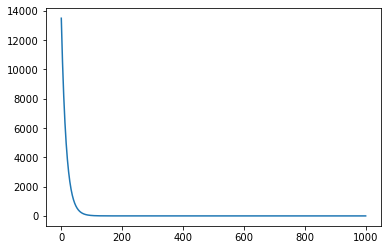

In [30]:
plt.plot(loss)

#### Use R2 score to evaluate LR equation output

In [31]:
from sklearn.metrics import r2_score
y_predicted = y_predicted.T
r2_score(y, y_predicted)

0.988702321903506